In [78]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import geoplotlib, geoplotlib.utils

import geocoder
import pycountry
from pymendez import auth
from pysurvey.plot import setup_sns as setup, icolorbar
import pandas as pd
import numpy as np
import networkx as nx
from IPython.display import Image

In [56]:
entities = pd.read_csv('/Users/ajmendez/Desktop/panama/offshore_leaks_csvs-20160621/Entities.csv')
print len(entities)
entities.head(1)

319150


/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,2,5,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256,23-MAR-2006,18-FEB-2013,...,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers


In [2]:
addresses = pd.read_csv('/Users/ajmendez/Desktop/panama/offshore_leaks_csvs-20160621/Addresses.csv')
print len(addresses)
addresses.head(1)

151054


/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,address,icij_id,valid_until,country_codes,countries,node_id,sourceID
0,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,6991059DFFB057DF310B9BF31CC4A0E6,The Panama Papers data is current through 2015,SGP,Singapore,14000001,Panama Papers


In [3]:
tmp = addresses['address'].dropna()
ca_addr = tmp[tmp.str.contains('California')]

# Get Lat / Lon from addresses

In [7]:
addr_map = {}
key = auth.auth('google_geocode', 'key')

In [8]:
for addr in ca_addr:
    if addr in addr_map:
        continue
    tmp = geocoder.google(addr, key=key)
    addr_map[addr] = (tmp.lat, tmp.lng)

In [12]:
df = pd.DataFrame(ca_addr)
df['lat'] = df['address'].apply(lambda x: addr_map.get(x)[0])
df['lon'] = df['address'].apply(lambda x: addr_map.get(x)[1])

In [77]:
df.to_csv('/Users/ajmendez/Desktop/panama/california.csv', encoding='utf8')

In [13]:
npix = 500
bbox = geoplotlib.utils.BoundingBox(north=40.009517, 
                                    west=-124.415105, 
                                    south=32.534264, 
                                    east=-114.131393)
geoplotlib.tiles_provider('positron')
geoplotlib.set_window_size(npix, npix)
geoplotlib.dot(df[df['lat'].notnull() & df['lon'].notnull()], color=(255,0,0,64))

geoplotlib.set_bbox(bbox)
geoplotlib.inline(npix)

In [76]:
#US 
# bbox = geoplotlib.utils.BoundingBox(north=51.338994, 
#                                     west=-130.34904, 
#                                     south=14.851581, 
#                                     east=-60.84904)
# California
# North Latitude: 42.009517 South Latitude: 32.534264 East Longitude: -114.131393 West Longitude: -124.415105
bbox = geoplotlib.utils.BoundingBox(north=40.009517, 
                                    west=-124.415105, 
                                    south=32.534264, 
                                    east=-114.131393)




geoplotlib.tiles_provider('positron')

npix = 500
geoplotlib.set_window_size(npix, npix)
geoplotlib.kde(df[df['lat'].notnull() & df['lon'].notnull()], bw=2, binsize=2,
               cmap=plt.cm.Reds, alpha=190)

geoplotlib.set_bbox(bbox)
geoplotlib.inline(npix)
# geoplotlib.show()

('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 2.0027213210764372)


In [14]:
npix = 500
bbox = geoplotlib.utils.BoundingBox(north=38.864245, 
                                    west=-123.632497, 
                                    south=36.894155, 
                                    east=-121.208178)




geoplotlib.tiles_provider('positron')
geoplotlib.set_window_size(npix, npix)
geoplotlib.dot(df[df['lat'].notnull() & df['lon'].notnull()], color=(255,0,0,64))

geoplotlib.set_bbox(bbox)
geoplotlib.inline(npix)

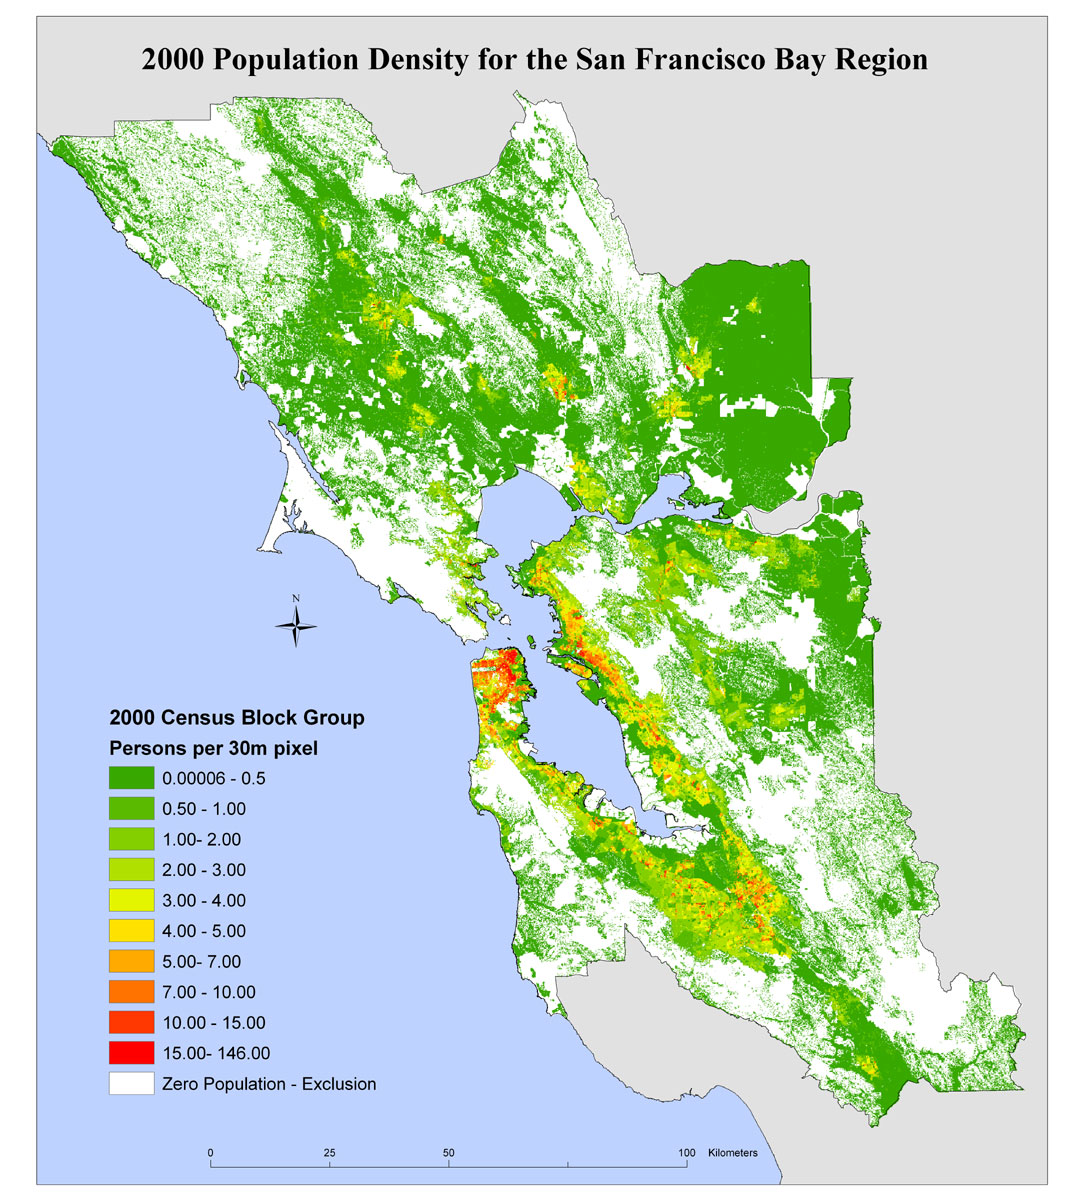

In [80]:
Image('http://geography.wr.usgs.gov/science/dasymetric/images/dasymap_2000lowres.jpg', width=500)

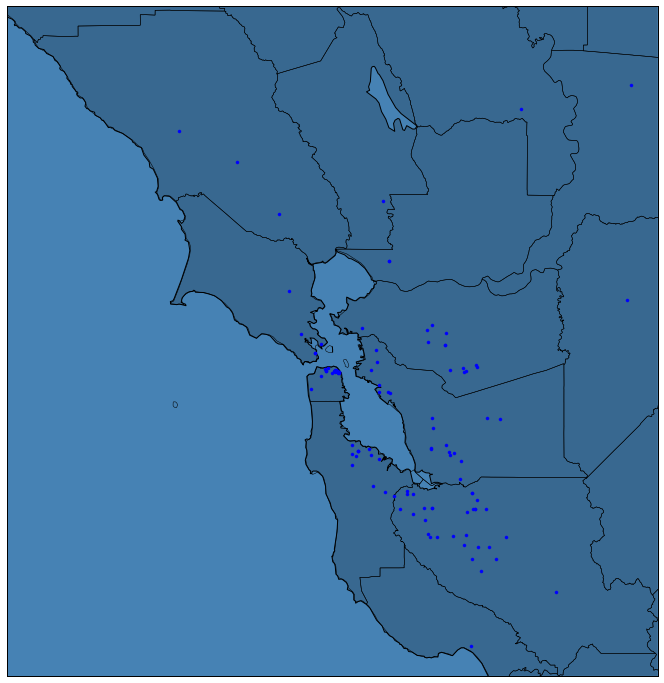

In [51]:
bbox = dict(north=38.864245, west=-123.632497, 
            south=36.894155, east=-121.208178)

plt.figure(figsize=(12,12))
m = Basemap(projection='merc',
            llcrnrlat=bbox['south'],urcrnrlat=bbox['north'],
            llcrnrlon=bbox['west'],urcrnrlon=bbox['east'],
            lat_ts=20,resolution='h')

# m = Basemap(width=90000,height=90000,
#             resolution='f',projection='aea',
#             lat_1=bbox['north'],lat_2=bbox['south'],
#             lon_0=np.mean([bbox['east'],bbox['west']]),
#             lat_0=np.mean([bbox['north'],bbox['south']]))
# m.drawcoastlines()
# m.drawcountries()
m.drawmapboundary(fill_color='steelblue')
m.fillcontinents(color=(0,0,0,0.2),
                 lake_color='steelblue', zorder=-2)
m.drawcoastlines()
# m.drawcoastlines()
m.drawcounties(linewidth=0.5)
# m.drawlsmask()

good = df[df['lat'].notnull() & df['lon'].notnull()]
x,y = m(np.array(good['lon']), np.array(good['lat']))
m.plot(x,y, '.')
# draw parallels and meridians.
# m.drawparallels(np.arange(-80.,81.,20.))
# m.drawmeridians(np.arange(-180.,181.,20.))
# m.drawmapboundary(fill_color='grey')

# # draw tissot's indicatrix to show distortion.
# ax = plt.gca()
# for y in np.linspace(m.ymax/20,19*m.ymax/20,10):
#     for x in np.linspace(m.xmax/20,19*m.xmax/20,12):
#         lon, lat = m(x,y,inverse=True)
#         poly = m.tissot(lon,lat,1.25,100,\
#                         facecolor='green',zorder=10,alpha=0.5)
# plt.title("Albers Equal Area Projection")
# plt.show()

In [54]:
G = nx.read_adjlist("pp_graph.adjlist")

In [60]:
uG = G.to_undirected()

In [66]:
for i,g in enumerate(nx.connected_component_subgraphs(uG)):
    if i < 10:
        continue
    print g
    break

In [67]:
len(g.nodes(True))

139